In [1]:
import numpy as np
import os
os.chdir("../")
import ppa
import matplotlib.pyplot as plt
import scipy.linalg as sl
from numpy import nan,inf
import scipy.constants as sc
import scipy.interpolate as si
import matplotlib as mpl
import glob
from astropy.time import Time
np.set_printoptions(precision=10)
import matplotlib
plt.rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['font.size'] = 13
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 1

# Changing this will affect the size of the plot in Jupyter notebook as well as resolution of the final PDF. Can change later
plt.rcParams['figure.dpi'] = 100

#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Serif'
#mpl.rcParams['mathtext.it'] = 'Serif:italic'
#mpl.rcParams['mathtext.bf'] = 'Serif:bold'

# tick parameters:
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True


mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
    
mpl.rcParams['xtick.major.size'] = 6  # default 3.5
mpl.rcParams['ytick.major.size'] = 6  # default 3.5
mpl.rcParams['xtick.minor.size'] =  3  # default 2 
mpl.rcParams['ytick.minor.size'] = 3  # default 2 
    
mpl.rcParams['xtick.major.width'] = 1  # default 0.8
mpl.rcParams['ytick.major.width'] = 1  # default 0.8
mpl.rcParams['xtick.minor.width'] =1  # default 0.6
mpl.rcParams['ytick.minor.width'] = 1  # default 0.6
mpl.rcParams['text.usetex'] = True


MASS_TO_FREQ = sc.eV / sc.h
def plot_timescales( ax,ymin,ymax,Tyr=18.1,annotate=True):

    l10ma_T = np.log10( 1/(1.0*sc.day*1 * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 day",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")
    
    # l10ma_T = np.log10( 1/(1.0*sc.day*14 * MASS_TO_FREQ) )
    # ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    # if annotate==True:
    #     ax.annotate(r"2 weeks",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(1.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 year",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(11.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T ,l10ma_T ],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"Solar Cycle",xy = [l10ma_T ,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(Tyr*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    if annotate==True:
        ax.annotate(r"T$_{\rm obs}$",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")


#rho = 7.68351e-6 * 0.40 #0.46
rho = (0.4 * 1e9 * 100**3) * sc.c**3  * sc.hbar**3 / sc.eV**3
l10S_to_l10ga = lambda l10S,l10ma: l10S+9+l10ma-np.log10(rho)/2


def make_ul_plot(ax,l10ma , ul_auto,ul_full ):
    #fig , ax = plt.subplots(figsize=(5,4))
    #ax.set_title("95% UL (Bayesian approach)")
    #ax.fill_between(np.log10(PPTA_QUIJOTE[:,0]),np.log10(PPTA_QUIJOTE[:,1]),np.zeros(len(PPTA_QUIJOTE)),alpha=0.5,fc='darkgreen',label="PPTA-QUIJOTE")


    _l10ma = np.linspace(-24,-18.5,101)
    #Chandra
    ax.plot(_l10ma,np.log10(5e-13)*np.ones(len(_l10ma)),color="black",ls='--')
    ax.annotate("Chandra\n H1821+643",xy=(-18.5-0.05,np.log10(5e-13)-0.1),size=12,va="top",ha="right")

    #Planck
    ax.plot(_l10ma,_l10ma+9,color="black",ls=':',lw=2)
    ax.annotate("Planck",xy=(-19.3,-10.5),size=14,va="top",ha="right",rotation="25")


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'.',color='blue')
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'-',color='blue',label="Full-corr")
    except:
        pass


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'.',color='red')
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'-',color='red',label="Auto-corr")
    except:
        pass



    ax.set_xlim(-23.5,-18.5)
    ymin = -16
    ymax = -6
    ax.set_ylim(ymin,ymax)
    #plt.title(r"the 95% upper limit on $\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$"+
    #          "\n assuming local DM density " + r"$0.40 {\rm GeV}/{\rm cm}^3$")

    ax.legend(loc=4,prop={'size': 10})

    plot_timescales( ax,ymin,ymax,annotate=True)


    #ax.plot(mock[:,0] , l10S_to_l10ga(mock[:,2],mock[:,0]),'red' )

    #plot_timescales(ax,ymin,ymax)

    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    ax.set_ylabel(r"$\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$")
    ax.grid(axis="y")


def make_bf_plot(ax,l10ma,lbf_af,lbf_nf):

    #fig , ax = plt.subplots(figsize=(5,3))
    ymin = min( [np.nanmin(lbf_nf) , np.nanmin(lbf_af) ,-10]  )
    ymax = max( [np.nanmax(lbf_nf) , np.nanmax(lbf_af) , 15 ] )
    plot_timescales( ax,ymin,ymax,annotate=False)

    try:
        lbf_nf[lbf_nf==inf]=ymax
        lbf_nf[lbf_nf==-inf]=ymin
        ax.plot(l10ma,lbf_nf,'-',color='b',label="Full vs None")
        ax.plot(l10ma,lbf_nf,'.',color='b')
    except:
        pass

    try:
        lbf_af[lbf_af==inf]=ymax
        lbf_af[lbf_af==-inf]=ymin
        ax.plot(l10ma,lbf_af,'-',color='r',label="Full vs Auto")
        ax.plot(l10ma,lbf_af,'.',color='r')
    except:
        pass
    
    
    ax.set_ylim(ymin,ymax)
    ax.set_xlim(-23.5,-18.5)
    ax.plot([-23.5,-18.5],[0,0],lw=2,color="black")


    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    #ax.set_ylabel(r"$\ln $BF$^{\rm full}_{\rm auto}$")
    ax.set_ylabel(r"$\ln $BF")
    ax.grid(axis="y")
    ax.legend(loc=2,prop={'size': 10})

## Data IONFR

(-5.0, 15.0)

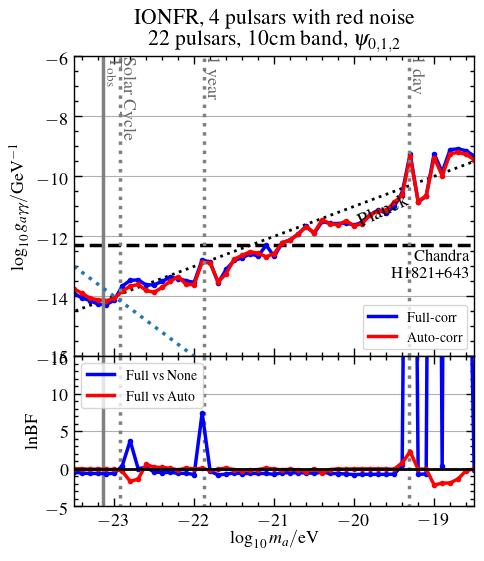

In [2]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-2.013, -2.256, -2.522, -2.672, -2.801, -2.827, -2.685, -2.621,
       -2.66 , -2.96 , -3.122, -3.056, -2.956, -2.9  , -3.258, -3.366,
       -2.711, -2.846, -3.574, -3.397, -3.021, -2.986, -2.969, -3.118,
       -3.337, -3.333, -3.066, -3.081, -2.968, -2.841, -3.136, -2.805,
       -3.033, -3.173, -3.138, -3.404, -3.428, -3.24 , -3.212, -3.294,
       -3.122, -2.987, -1.791, -3.395, -3.299, -2.13 , -2.833, -2.201,
       -2.259, -2.426, -2.697])



ul_full = np.array([-2.163, -2.411, -2.595, -2.823, -2.932, -2.886, -2.519, -2.423,
       -2.509, -2.777, -2.87 , -2.857, -2.818, -2.964, -3.137, -3.293,
       -2.637, -2.821, -3.602, -3.259, -3.061, -3.074, -3.036, -3.215,
       -2.95 , -3.427, -3.074, -3.075, -2.991, -2.814, -3.16 , -2.859,
       -3.026, -3.131, -3.206, -3.386, -3.383, -3.236, -3.183, -3.378,
       -3.26 , -2.9  , -1.703, -3.406, -3.324, -2.   , -2.717, -2.065,
       -2.14 , -2.305, -2.579])


make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("IONFR, 4 pulsars with red noise\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 
lbf_nf = np.array([-0.451, -0.571, -0.613, -0.61 , -0.645, -0.603,  0.375,  3.741,
        0.019,  0.208, -0.418, -0.492, -0.462, -0.593, -0.591, -0.754,
          inf, -0.322, -0.801, -0.706, -0.533, -0.647, -0.612, -0.602,
       -0.616, -0.738, -0.506, -0.538, -0.517, -0.531, -0.594, -0.445,
       -0.613, -0.626, -0.688, -0.772, -0.725, -0.723, -0.725, -0.74 ,
       -0.698,  0.449,    inf, -0.749, -0.659,    inf,  0.434,    inf,
          inf,    inf, -0.211])

idx = np.array([16,42,45,47,48,49])
nn  = 13677.09
ff  = np.array([ 13660.077, 13797.323, 13837.615, 13879.881, 13813.663, 13734.615])
lbf_nf[idx] = ff-nn
lbf_nf[16] = np.log(4.3239)+6


lbf_af = np.array([-1.435e-02,  2.156e-02, -6.507e-02, -1.449e-02, -8.163e-02,
       -6.789e-02, -2.986e-01, -1.659e+00, -1.369e+00,  6.070e-01,
        2.069e-01,  1.954e-01,  7.758e-02, -1.525e-01,  1.085e-01,
       -1.017e-02,  5.499e-02, -1.884e-01, -7.531e-02,  1.289e-01,
       -1.103e-01, -2.215e-01, -1.419e-01, -1.013e-01,  1.102e-01,
       -4.290e-02, -1.187e-01, -5.773e-02, -1.342e-01, -3.702e-01,
        1.832e-02, -5.062e-01, -9.679e-02,  5.742e-03, -4.512e-02,
        7.290e-03, -4.154e-03, -4.606e-03,  4.435e-04, -1.131e-02,
       -5.512e-02,  8.089e-01,  2.290e+00, -7.004e-02, -1.116e-02,
       -2.158e+00, -1.902e+00, -1.887e+00, -1.332e+00, -2.329e-01,
       -7.880e-03])



make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf)

plt.ylim(-5,15)


In [3]:
crit = np.where(lbf_nf>20)[0]
np.array([crit,l10ma[crit],lbf_nf[crit]]).T
for c in crit:
    print(c,l10ma[c])


42 -19.3
45 -19.0
47 -18.8
48 -18.7
49 -18.6


## Data NO IONO

(-5.0, 35.0)

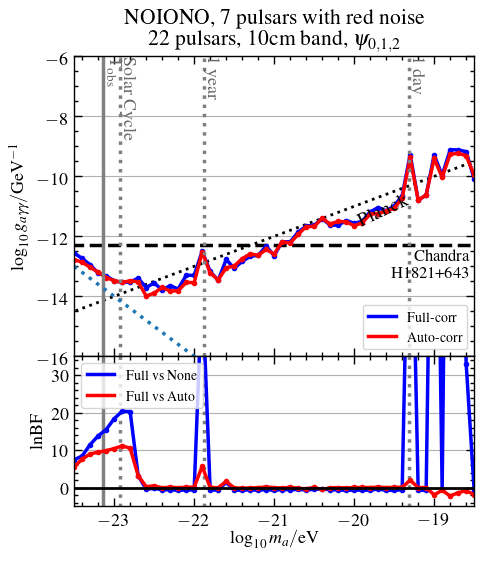

In [4]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-1.034, -1.219, -1.486, -1.753, -2.031, -2.233, -2.394, -2.435,
       -2.573, -3.148, -3.146, -3.058, -3.28 , -3.366, -3.191, -3.298,
       -2.381, -3.169, -3.511, -3.202, -3.248, -3.101, -3.042, -3.187,
       -3.094, -3.344, -3.038, -3.176, -2.988, -2.833, -2.924, -2.757,
       -3.043, -3.061, -3.17 , -3.403, -3.404, -3.218, -3.296, -3.317,
       -3.323, -3.084, -1.826, -3.352, -3.275, -2.159, -2.887, -2.216,
       -2.293, -2.463, -3.223])


ul_full = np.array([-0.812, -1.093, -1.404, -1.78 , -1.977, -2.237, -2.394, -2.476,
       -2.451, -2.864, -2.808, -3.145, -3.097, -3.312, -2.956, -3.055,
       -2.355, -3.125, -3.524, -2.927, -3.322, -3.192, -3.122, -3.188,
       -2.983, -3.398, -3.036, -3.139, -2.917, -2.81 , -2.892, -2.764,
       -3.081, -3.186, -3.129, -3.318, -3.359, -3.142, -3.095, -3.308,
       -3.243, -3.005, -1.729, -3.351, -3.284, -2.041, -2.824, -2.071,
       -2.172, -2.336, -3.345])




make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("NOIONO, 7 pulsars with red noise\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 
lbf_nf = np.array([   inf,    inf,    inf,    inf,    inf,    inf,    inf,    inf,
        3.199, -0.449, -0.175, -0.606, -0.568, -0.729, -0.623, -0.652,
          inf, -0.587, -0.716,  0.918, -0.658, -0.73 , -0.548, -0.741,
       -0.509, -0.738, -0.512, -0.587, -0.488, -0.644, -0.438, -0.385,
       -0.542, -0.666, -0.717, -0.671, -0.685, -0.684, -0.376, -0.708,
       -0.734, -0.578,    inf, -0.73 , -0.725,    inf, -0.504,    inf,
          inf,    inf, -0.712])
lbf_nf[lbf_nf==np.inf]=100


lbf_af = np.array([ 5.514e+00,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,  3.204e+00,  2.420e-01,
        4.675e-01, -6.033e-02,  1.169e-01, -4.208e-02,  1.101e-01,
        1.116e-01,  5.651e+00,  3.136e-02, -4.070e-02,  1.684e+00,
       -6.921e-02, -1.391e-01, -1.131e-01, -3.014e-03,  1.640e-01,
       -7.544e-04, -1.275e-01,  1.120e-01, -1.757e-01, -3.072e-01,
        2.883e-02, -5.002e-01, -4.159e-02, -1.394e-03, -8.341e-02,
        2.829e-02,  2.857e-02,  1.688e-02,  1.319e-01,  5.305e-03,
        8.043e-02,  7.083e-02,  1.981e+00,  9.165e-03,  1.129e-02,
       -1.935e+00, -7.284e-01, -2.233e+00, -1.357e+00, -8.105e-01,
       -1.906e+00])


idx = np.array([0,1,2,3,4,5,6,7,16,42,45,47,48,49])
nn  = 13571.45
ff  = np.array([13575.36 , 13583.17 ,13583.66 , 13588.87 , 13586.71 , 13590.65\
                 , 13593.78 , 13595.16  , 13625.74 , 13672.12 , 13718.47 , 13770.57 , 13687.93 , 13604.52]) 
lbf_nf[idx] = ff - nn

idx = np.array([1,2,3,4,5,6,7])
aa = np.array([13570.06271602, 13572.99206179, 13576.93978279, 13574.44087492, 13573.43010664, 13582.1967153 , 13577.39340056])
lbf_af[idx] = aa - nn

lbf_af[[1,2,3,4,5,6,7]] = np.array([-1.399, -0.037,  0.455,  0.857,  1.409,  2.124,  1.505])+9


lbf_nf[19] = np.log(0.5740) + 2
lbf_af[19] = np.log(0.7099) + 2
lbf_nf[0]  = np.log(11.3115) + 5
lbf_nf[1]  = np.log(0.2075)  + 10
lbf_nf[2]  = np.log(4.4028)  + 10
lbf_nf[3]  = np.log(2.2029)  + 13
lbf_nf[4]  = np.log(0.5888) + 16
lbf_nf[5]  = np.log(0.5286) + 19
lbf_nf[6]  = np.log(3.9168) + 19
lbf_nf[7]  = np.log(3.4904) + 19
make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf)

plt.ylim(-5,35)

In [5]:
crit = np.where(lbf_af>20)[0]
np.array([crit,l10ma[crit],lbf_af[crit]]).T
for c in crit:
    print(c,l10ma[c])


# Single pulsar upper limit

In [6]:
# import json
# with open("Fig_1_data.json",'w') as f:
#     json.dump(all_data,f,indent=2)

In [7]:
# All_Results = {}
# PSR_NAME_LIST =  ['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
# for psrn in PSR_NAME_LIST:
#     All_Results.update({psrn:{}})
    

In [3]:
import json
with open("examples/Fig_1_data.json",'r') as f:
    all_data = json.load(f)

with open("ppa/Parfile/spa_results.json",'r') as f:
    spa_results = json.load(f)

PSR_DICT= ppa.Load_All_Pulsar_Info()

NameError: name 'pwd' is not defined

/opt/anaconda3/envs/ppa/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/envs/ppa/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


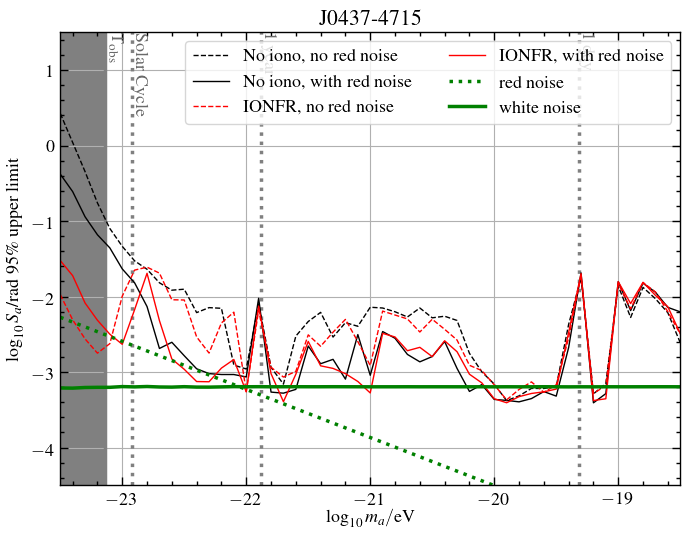

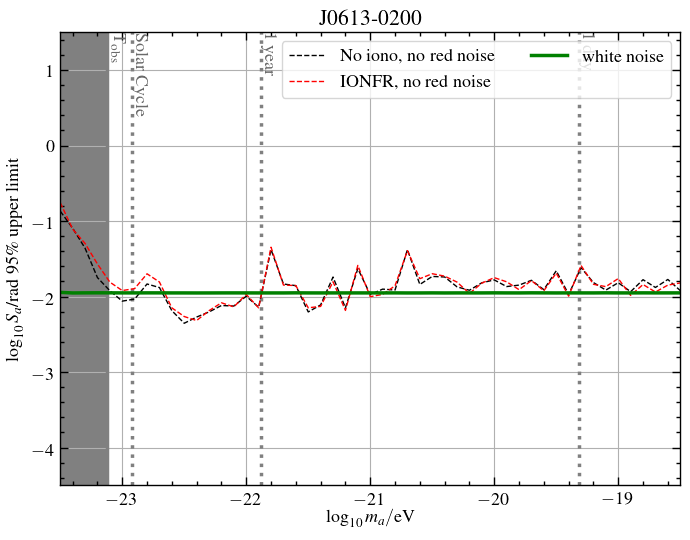

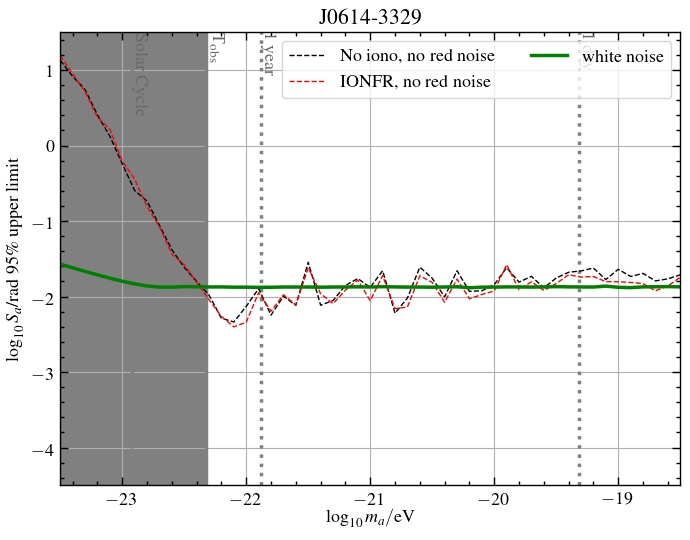

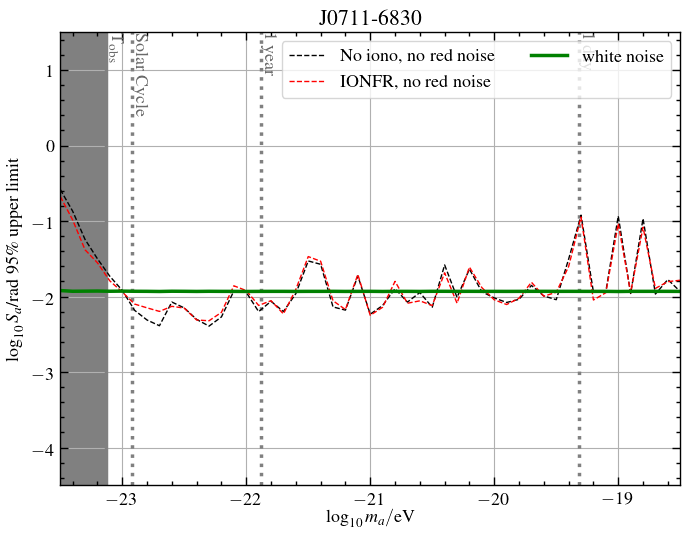

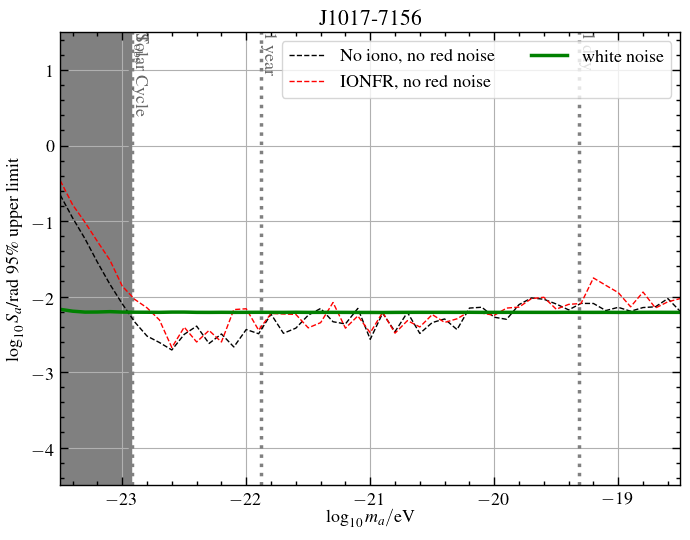

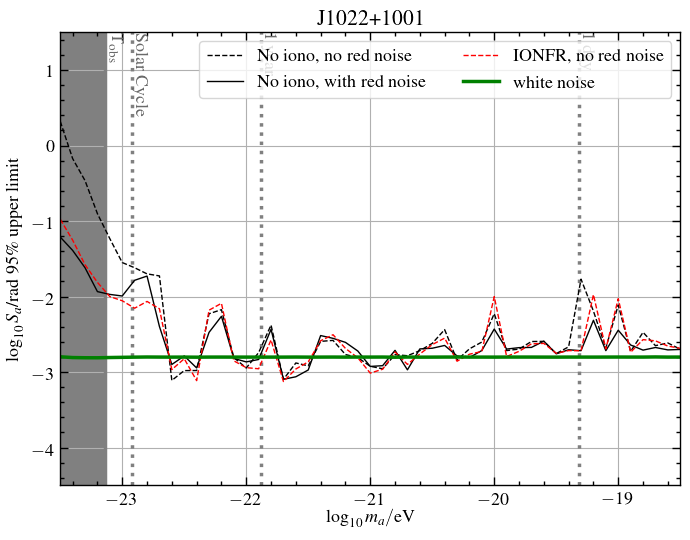

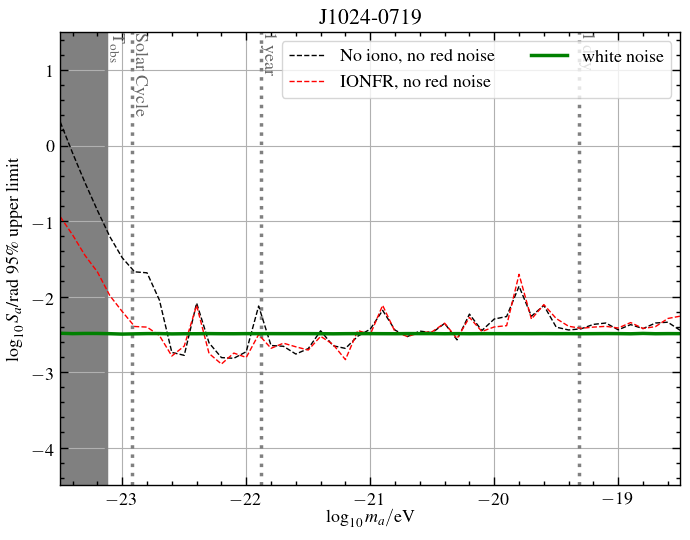

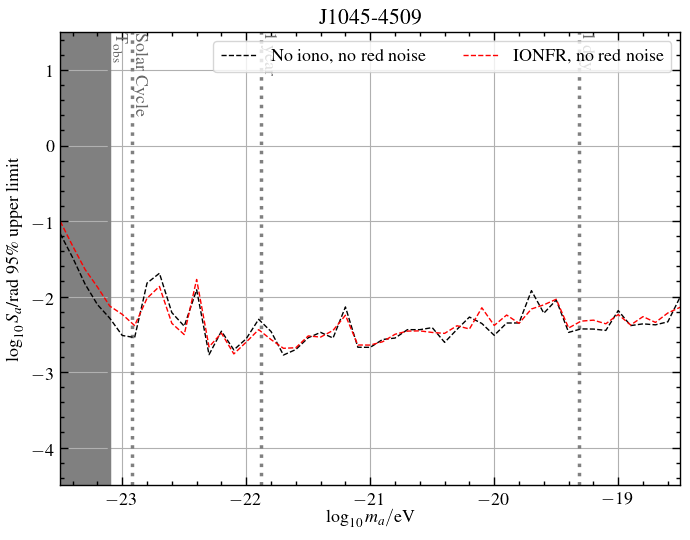

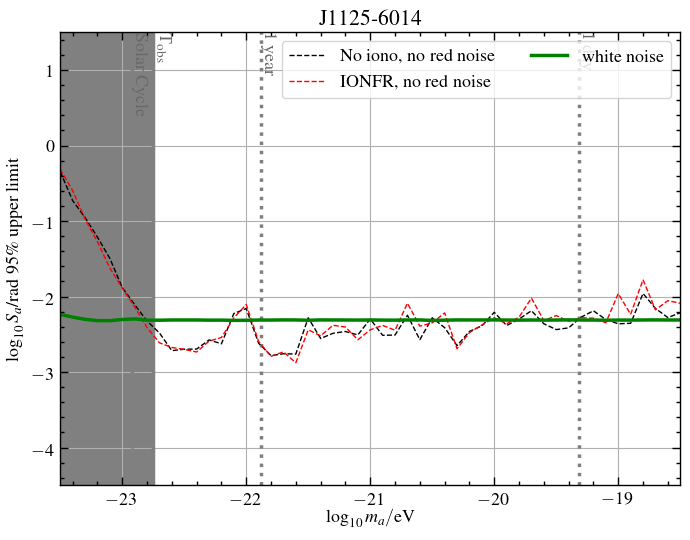

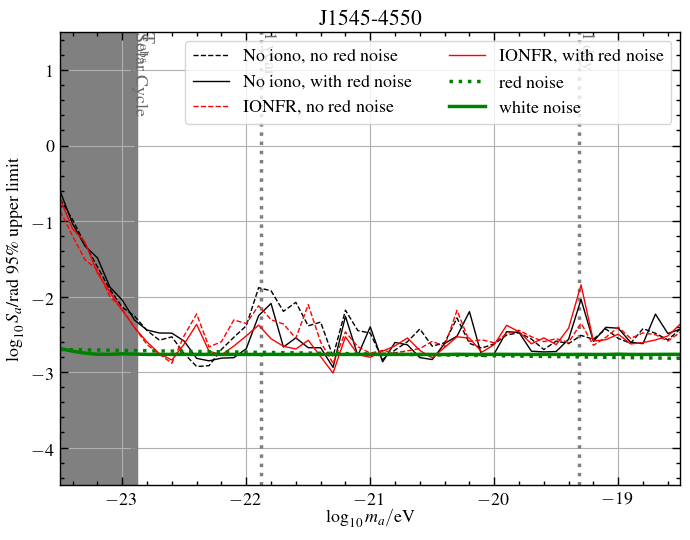

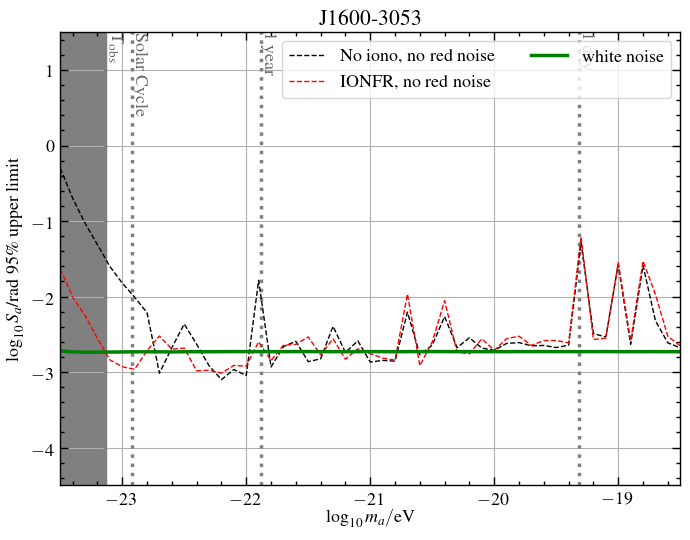

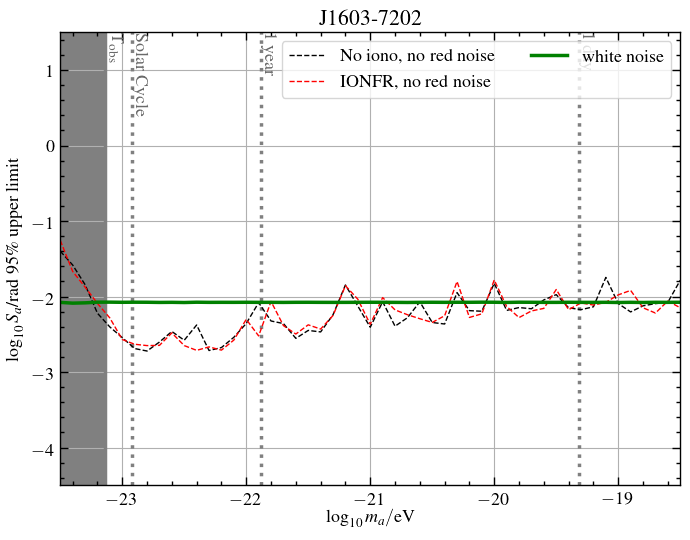

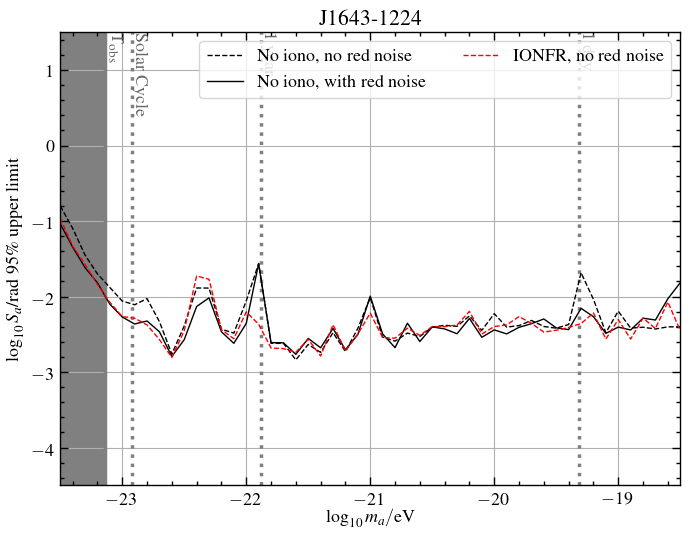

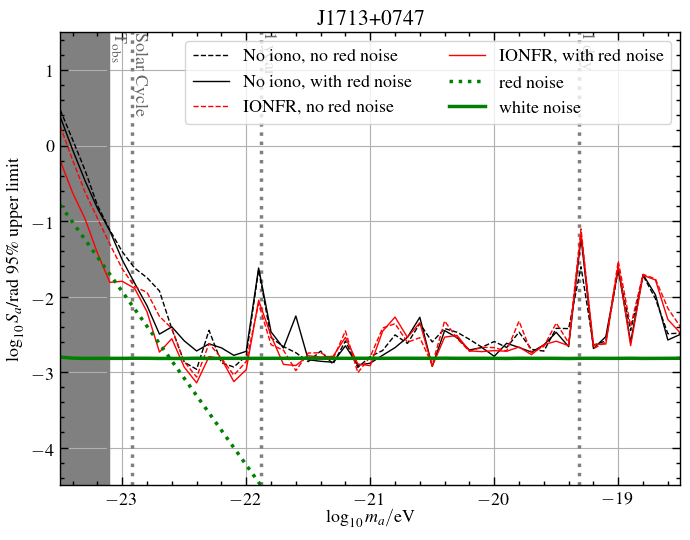

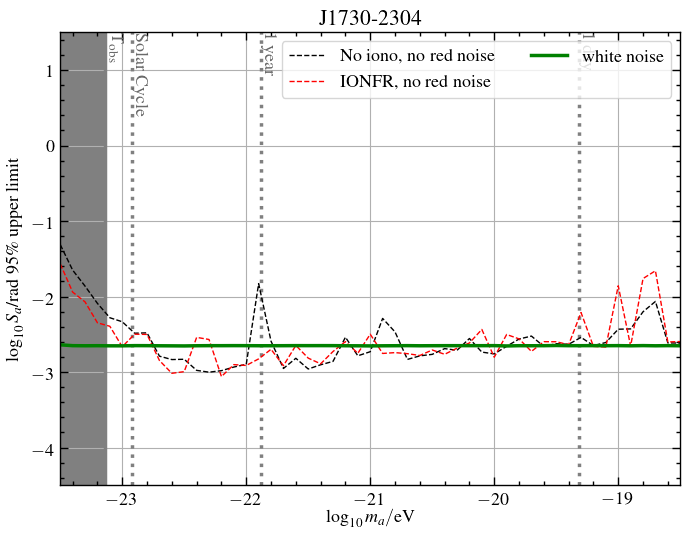

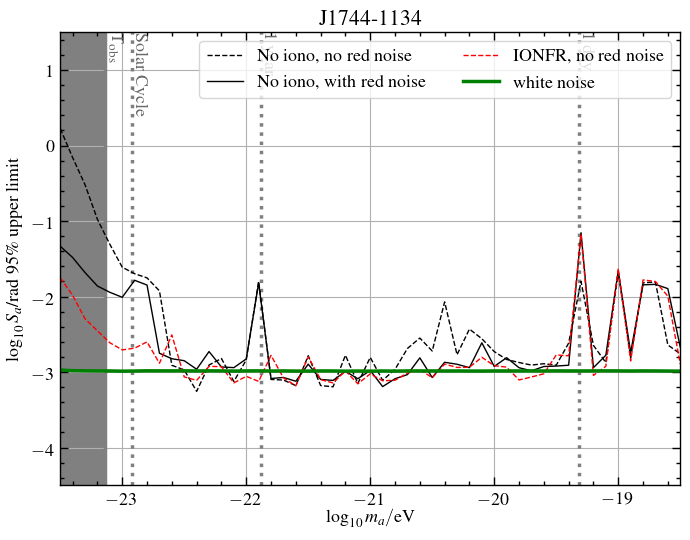

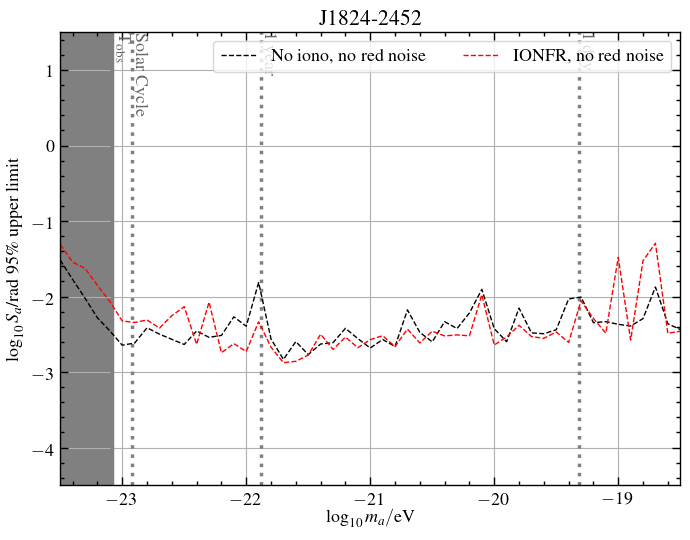

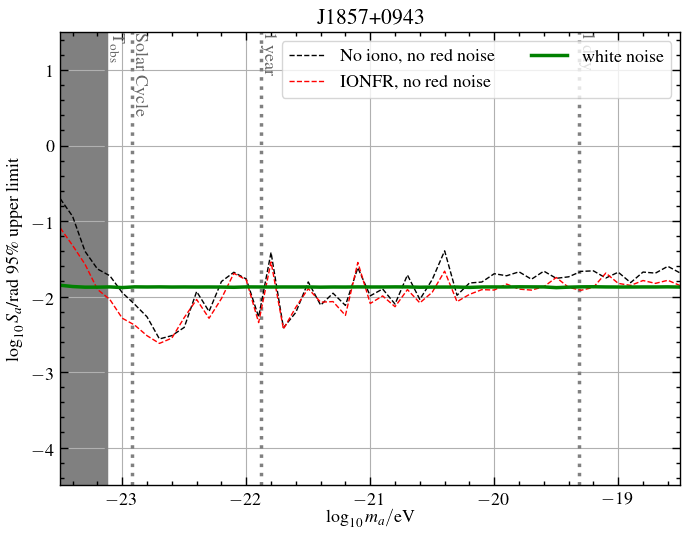

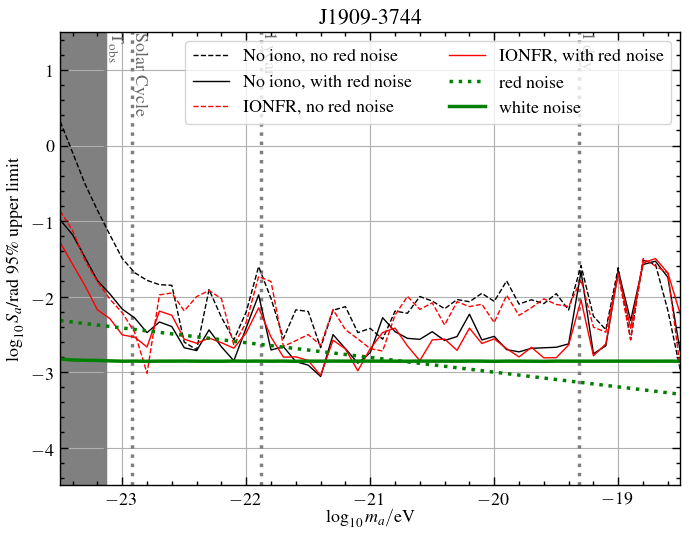

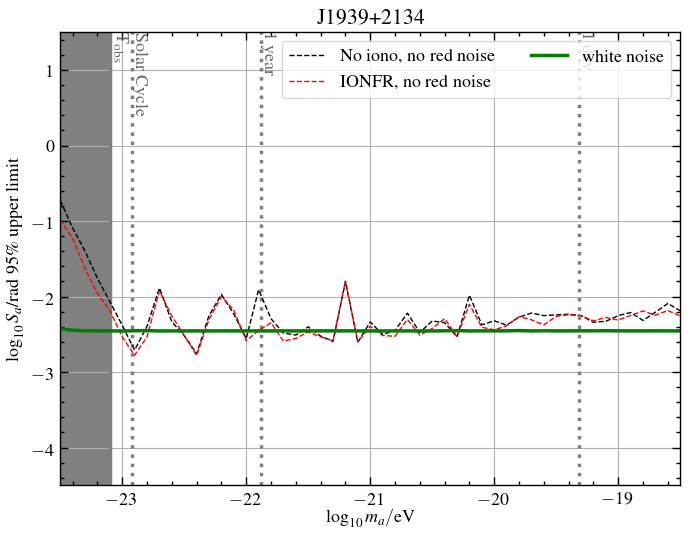

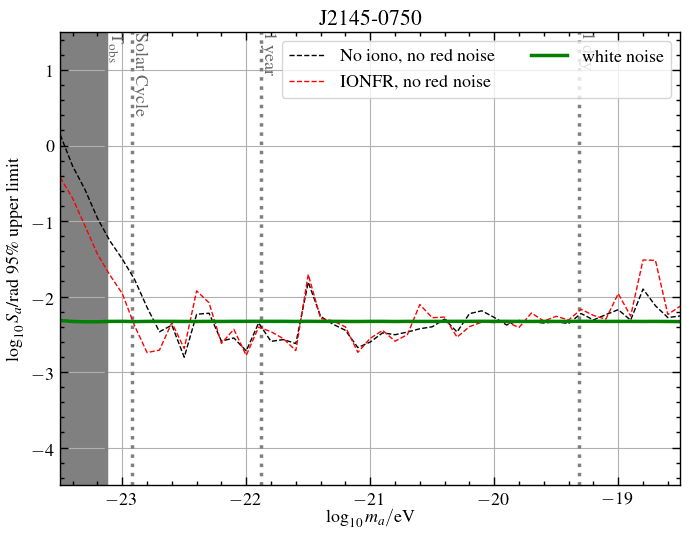

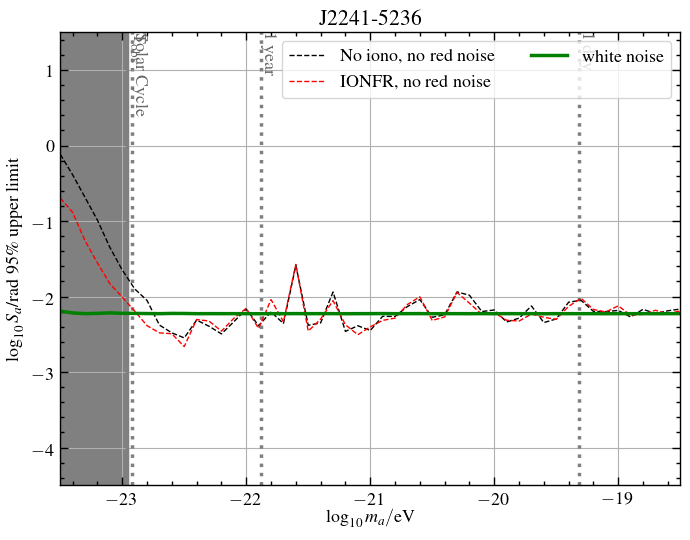

In [19]:
l10ma = np.arange(5,56)*0.1 -24
freqs = MASS_TO_FREQ * 10**l10ma

PSRNS=['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
#PSRNS=['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1713+0747']

for psrn in PSRNS:

    # get the noise prediction

    psr=ppa.Pulsar( PSR_DICT[psrn ],iono="ionfr",order=2)
    sigma = 1/np.sqrt( np.sum(1/psr.DPA_ERR[0]**2) )
    log10EF , log10Eq , log10Sr , gamma, all_lBF = spa_results[psrn]["ionfr_10cm"]
    EF = 10**log10EF
    EQ = 10**log10Eq
    sigma_new = np.sqrt( sigma**2 *EF**2 + EQ**2  )
    red = 10**log10Sr / np.sqrt(  psr.TOBSs[0] / sc.year ) * ( freqs * sc.year )**(gamma/2)
    vals_original = []
    vals_rescaled = []
    for f in freqs:
        F = psr.get_F_any(psr.TOAs[0],f)
        mtx = F@F.T

        Cw = psr.DPA_ERR[0]**2 #* EF**2 + EQ**2 
        val_original = np.sqrt(np.sqrt(sl.det(sl.inv(mtx).T@(F@np.diag(Cw)@F.T)@sl.inv(mtx))))
        vals_original.append(val_original)

        Cw = psr.DPA_ERR[0]**2 * EF**2 + EQ**2 
        val_rescaled = np.sqrt(np.sqrt(sl.det(sl.inv(mtx).T@(F@np.diag(Cw)@F.T)@sl.inv(mtx))))
        vals_rescaled.append(val_rescaled)      

    
    

    # making plot
    fig,ax = plt.subplots(figsize=(8,6))
    ax.grid()
    ax.set_xlim(-23.5,-18.5)
    ymin = -4.5
    ymax = 1.5
    plot_timescales(ax,ymin,ymax,Tyr = psr.TOBSs[0]/sc.year,annotate=True)
    plt.ylim(ymin,ymax)
    try:
        ax.plot( l10ma , all_data[psrn]["NOIONO_NORED"] , 'k--' , label="No iono, no red noise" , lw=1 )
    except:
        pass
    try:
        ax.plot( l10ma , all_data[psrn]["NOIONO_RED"] ,'k-', label="No iono, with red noise" , lw=1 )
    except:
        pass
    try:
        ax.plot( l10ma , all_data[psrn]["IONFR_NORED"] ,'r--', label="IONFR, no red noise" , lw=1 )
    except:
        pass
    try:
        ax.plot( l10ma , all_data[psrn]["IONFR_RED"] ,'r-', label="IONFR, with red noise" , lw=1 )
    except:
        pass
    plt.title(psrn)
    

    
    #plt.plot([-23.5,-18.5],[np.log10(sigma),np.log10(sigma)],'b-',label='white noise')
    # if all_lBF[2]>2.3:
    #     plt.plot([-23.5,-18.5],[np.log10(sigma_new),np.log10(sigma_new)],'b--',label='white noise (rescaled)')
    if all_lBF[3]>2.3:
        plt.plot(l10ma , np.log10(red),'g:' ,label="red noise")
        all_data[psrn].update( {  "RED":np.log10(red).tolist()} )
    plt.plot(l10ma ,np.log10(vals_rescaled),'g-',label="white noise")
    all_data[psrn].update( {  "WHITE":np.log10(vals_rescaled).tolist()} )


    #plt.plot(l10ma ,np.log10(vals_original),'g--',label="white noise, original")
    

    ax.legend(ncol=2)

    plt.xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    plt.ylabel(r"$\log_{10}S_a$/rad 95\% upper limit")
    plt.fill_betweenx(x1 = l10ma[0],x2 = np.log10(1/(psr.TOBSs[0]*MASS_TO_FREQ)) , y=[ymin,ymax],fc='gray')

    plt.savefig("../figures/spl_"+psrn+".jpg",bbox_inches='tight')



    
    # if psrn !="J0437-4715":
    #     plt.close()

In [20]:
import json
with open("examples/Fig_1_data.json",'w') as f:
    json.dump(all_data,f,indent=2)

In [17]:
all_data[PSRNS[1]].keys()

dict_keys(['IONFR_NORED', 'NOIONO_NORED', 'WHITE'])

In [11]:
# chain = np.loadtxt("chain_1.txt")
# import corner
# for i in range(22):
#     corner.corner( chain[300:,1:-4][:,[0+i,22+i,44+i,66+i]] ,smooth=0,\
#                 labels=[r"$\log_{10}$EF" , r"$\log_{10}$EQ" , r"$\log_{10}S_{\rm red}$",r"$\Gamma$" , r"$D$"],\
#                     show_titles=True);
#     plt.suptitle(PSRNS[i]+r"   $m_a = 10^{-21.5}$eV")

#     #plt.savefig("../Figures/"+PSRNS[i]+"_ionfr_10cm_COMBINED")
#     plt.close()